In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as msno

In [2]:
#reading data
real = pd.read_csv(r'C:\Users\hp\Downloads\real_estate_data.csv')

In [3]:
# make a subset of the data
data = real[['SaleType','SalePrice','Neighborhood','OverallQual', 'OverallCond', 'YearBuilt', 'YrSold','MSZoning','Fence','SaleCondition']]

In [4]:
data.describe()

,SalePrice,OverallQual,OverallCond,YearBuilt,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,5.575342,1971.267808,2007.815753
std,79442.502883,1.382997,1.112799,30.202904,1.328095
min,34900.000000,1.000000,1.000000,1872.000000,2006.000000
25%,129975.000000,5.000000,5.000000,1954.000000,2007.000000
50%,163000.000000,6.000000,5.000000,1973.000000,2008.000000
75%,214000.000000,7.000000,6.000000,2000.000000,2009.000000
max,755000.000000,10.000000,9.000000,2010.000000,2010.000000


In [5]:
#statistical info on data
data.describe()

,SalePrice,OverallQual,OverallCond,YearBuilt,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,5.575342,1971.267808,2007.815753
std,79442.502883,1.382997,1.112799,30.202904,1.328095
min,34900.000000,1.000000,1.000000,1872.000000,2006.000000
25%,129975.000000,5.000000,5.000000,1954.000000,2007.000000
50%,163000.000000,6.000000,5.000000,1973.000000,2008.000000
75%,214000.000000,7.000000,6.000000,2000.000000,2009.000000
max,755000.000000,10.000000,9.000000,2010.000000,2010.000000


In [6]:
data.describe(exclude=["int64","float64"])

,SaleType,Neighborhood,MSZoning,Fence,SaleCondition
count,1460,1460,1460,281,1460
unique,9,25,5,4,6
top,WD,NAmes,RL,MnPrv,Normal
freq,1267,225,1151,157,1198


#### Data Preprocessing

In [7]:
#identifying duplicated data values
data.duplicated().sum()

5

In [8]:
data[data.duplicated()]

,SaleType,SalePrice,Neighborhood,OverallQual,OverallCond,YearBuilt,YrSold,MSZoning,Fence,SaleCondition
909,WD,174000,Gilbert,6,5,2005,2009,RL,NaN,Normal
933,WD,190000,CollgCr,7,5,2004,2009,RL,NaN,Normal
1115,New,318000,NridgHt,8,5,2007,2007,RL,NaN,Partial
1304,WD,130000,Edwards,7,5,2004,2006,RM,NaN,Normal
1424,WD,144000,NAmes,5,5,1958,2007,RL,GdWo,Normal


In [9]:
data.isna().sum()

SaleType            0
SalePrice           0
Neighborhood        0
OverallQual         0
OverallCond         0
YearBuilt           0
YrSold              0
MSZoning            0
Fence            1179
SaleCondition       0
dtype: int64

**observations**
-Fence feature has 1179 missing values
-the dataset have 6 duplicates

In [10]:
#data["Fence"].fillna(). used to replace null values with another calue

In [11]:
# to drop a whole column
#del data[Fence]
# data.drop('Fence', axis=1, inplace=True)

In [12]:
# remove duplicates
data.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22964\446094113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [13]:
# confirm removal of null values
data.isna().sum()

SaleType            0
SalePrice           0
Neighborhood        0
OverallQual         0
OverallCond         0
YearBuilt           0
YrSold              0
MSZoning            0
Fence            1175
SaleCondition       0
dtype: int64

In [14]:
# confirm removal of duplicates
data.duplicated().sum()

0

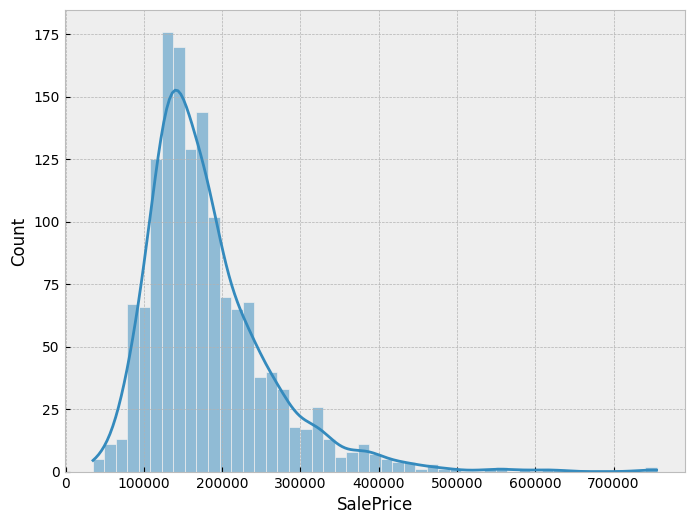

In [15]:
#sales price analysis
plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.histplot(data['SalePrice'],kde=True);

##### Observation
- The data visualization for the salesprice feature is positively skewed
- Outliers are observed especially at price above 500000

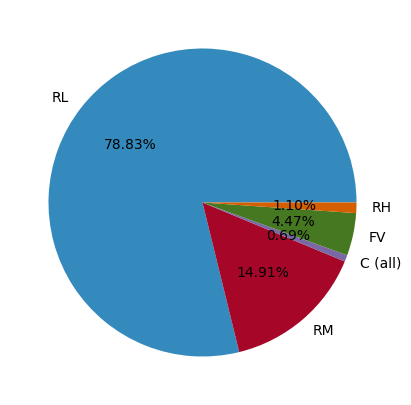

In [16]:
# unvivariate plot for mzone feature
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(data["MSZoning"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show()

#### 79% of the houses fall under the RL zone while the C zone has the least percentage (0.7%) of houses

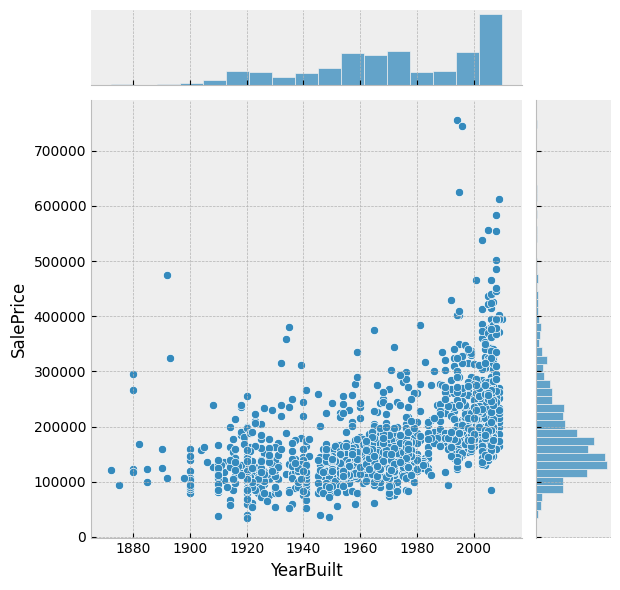

In [17]:
# divarite analysis of sales price vs yr bouse was built
sns.jointplot(x="YearBuilt", y="SalePrice", data=data);

#### There appears to be a positive relationship between the sales price and the year the house is built.
- the newer the house the more expensive. 
- Although there are some outliers, with some older houses being more expensive. 
- The year the house is built may be a good predictor of the cost of the house.

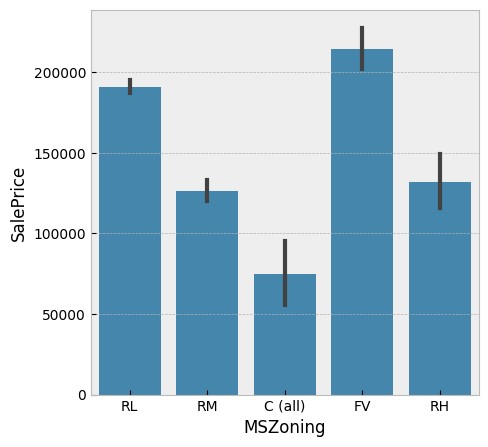

In [53]:
# divariate plot to explore salesprics vs house zone
plt.figure(figsize=(5,5))
sns.barplot(x="MSZoning", y="SalePrice", data=data);

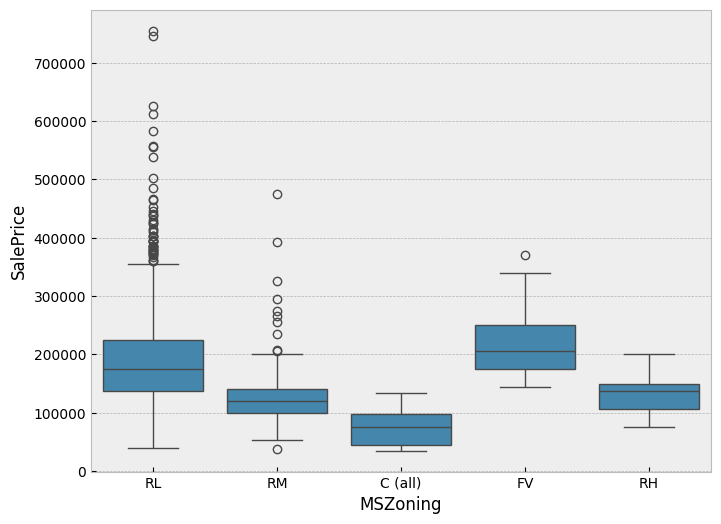

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x="MSZoning", y="SalePrice", data=data);

- We can observe that houses from the FV region tend to be the most expensive followed by region RL.
- The least expensive region is the C region.
- Houses that are in the C regio tend to be the cheapest houses with a threshold of 100000.

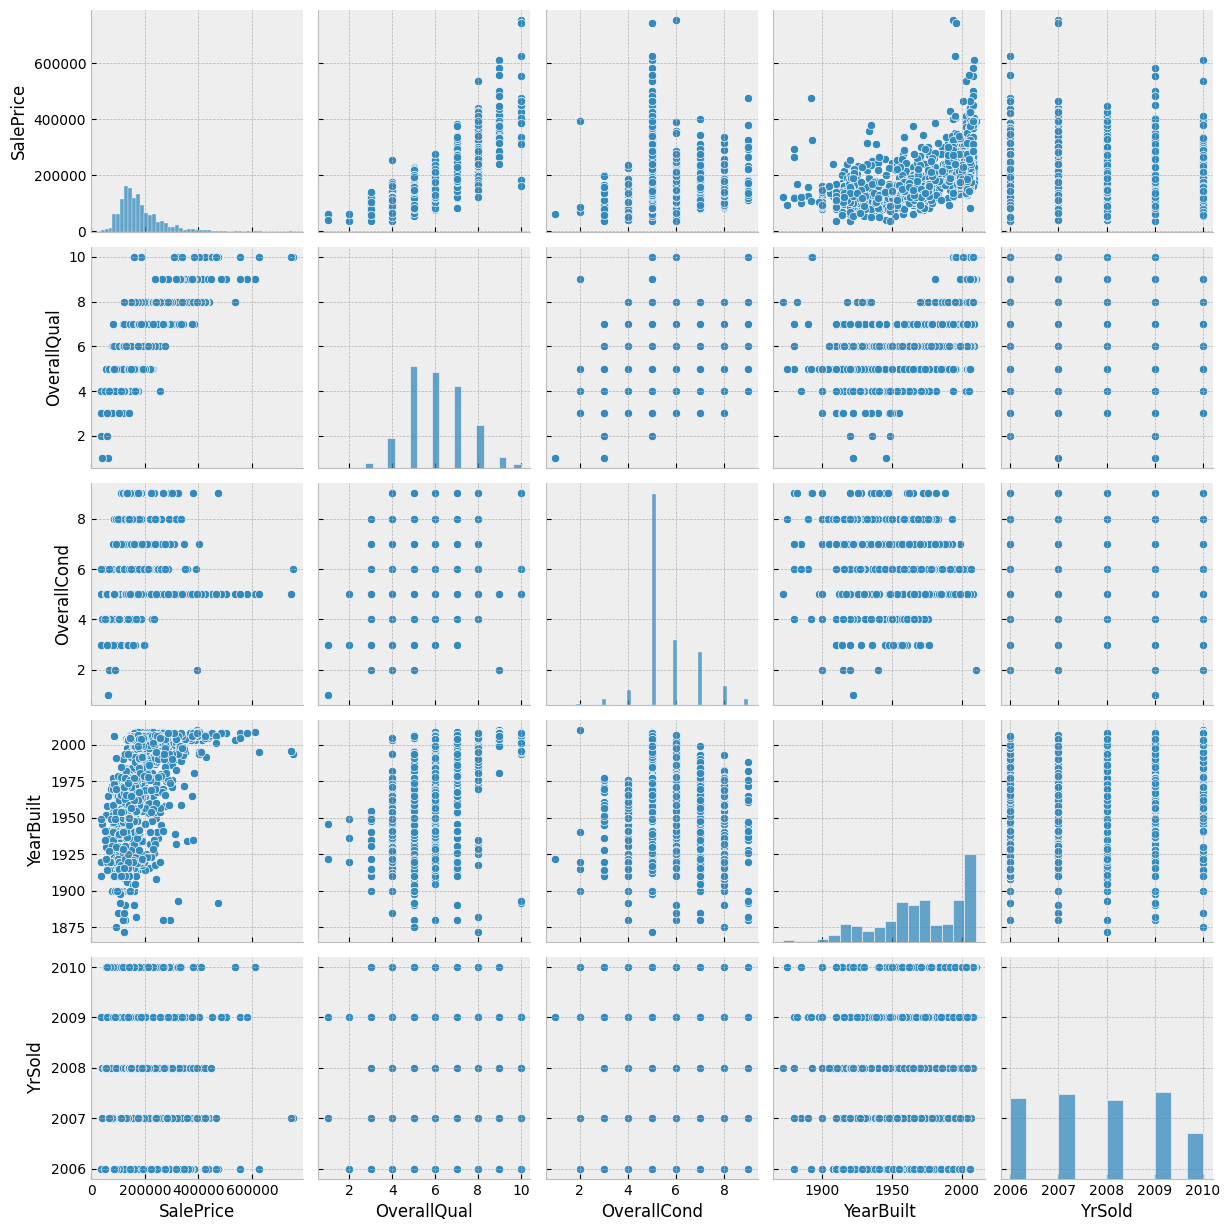

In [20]:
sns.pairplot(data=data);

#### Observations
- Overall quality of house have a positive coorelation with sales price

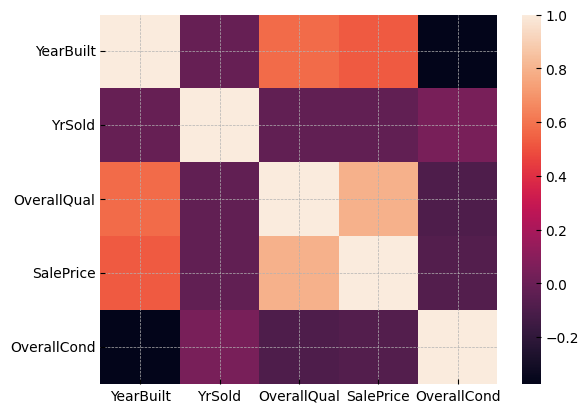

In [21]:
g = ["YearBuilt","YrSold","OverallQual","SalePrice","OverallCond"]
sns.heatmap(data[g].corr());

In [22]:
data3 = real[['MSSubClass', 'LandSlope', 'LotFrontage', 'LotArea', 'Street',
       'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig','Condition1', 'Condition2','SalePrice']]

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   LandSlope    1460 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   Alley        91 non-null     object 
 6   LotShape     1460 non-null   object 
 7   LandContour  1460 non-null   object 
 8   Utilities    1460 non-null   object 
 9   LotConfig    1460 non-null   object 
 10  Condition1   1460 non-null   object 
 11  Condition2   1460 non-null   object 
 12  SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 148.4+ KB


In [24]:
data3.describe()

,MSSubClass,LotFrontage,LotArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,180921.195890
std,42.300571,24.284752,9981.264932,79442.502883
min,20.000000,21.000000,1300.000000,34900.000000
25%,20.000000,59.000000,7553.500000,129975.000000
50%,50.000000,69.000000,9478.500000,163000.000000
75%,70.000000,80.000000,11601.500000,214000.000000
max,190.000000,313.000000,215245.000000,755000.000000


- LotFrontage column have 259 missing values.

In [25]:
data3.describe(include=['bool','object'])

,LandSlope,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Condition1,Condition2
count,1460,1460,91,1460,1460,1460,1460,1460,1460
unique,3,2,2,4,4,2,5,9,8
top,Gtl,Pave,Grvl,Reg,Lvl,AllPub,Inside,Norm,Norm
freq,1382,1454,50,925,1311,1459,1052,1260,1445


- Alley column have 1369 missing values

In [26]:
null_values = data3.isnull().sum()
null_values

MSSubClass        0
LandSlope         0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
Condition1        0
Condition2        0
SalePrice         0
dtype: int64

In [27]:
# delete the alley column due to the large amount of missing values
del data3["Alley"]

In [28]:
# to check the other missing values in the data
data3[data3.isnull().any(axis=1)]

,MSSubClass,LandSlope,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Condition1,Condition2,SalePrice
7,60,Gtl,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,PosN,Norm,200000
12,20,Gtl,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Norm,Norm,144000
14,20,Gtl,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Norm,Norm,157000
16,20,Gtl,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Norm,Norm,149000
24,20,Gtl,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Norm,Norm,154000
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,Gtl,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Norm,Norm,182900
1431,120,Gtl,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Norm,Norm,143750
1441,120,Gtl,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Norm,Norm,149300
1443,30,Gtl,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Norm,Norm,121000


In [29]:
# to replace the missing values in the LotFrontage column with the median value
median_lotfrontage = data3['LotFrontage'].median()
data3.fillna(median_lotfrontage, inplace=True)
median_lotfrontage

C:\Users\hp\AppData\Local\Temp\ipykernel_22964\2427147228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.fillna(median_lotfrontage, inplace=True)


69.0

In [30]:
# noticed that the MSSubClass type is an integer instead of object.
# Converts the type to object
data3.loc[:, 'MSSubClass'] = data3['MSSubClass'].astype('object')

## Univariate Analysis

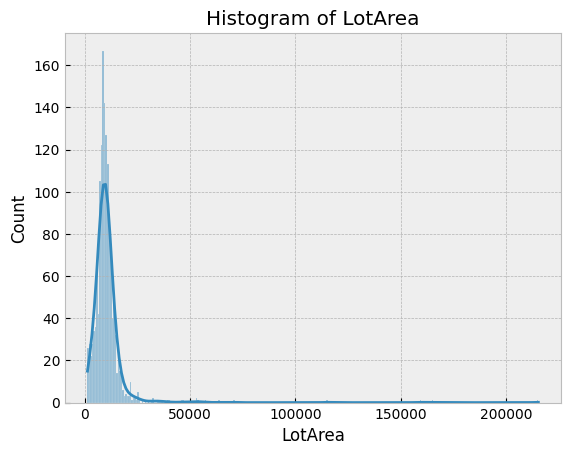

In [33]:
# plot histogram of the lot area
plt.style.use('bmh')
sns.histplot(x='LotArea', data=data3, kde=True)
plt.title('Histogram of LotArea');

- The distribution of lot areas is positively skewed. This means there are more lots with smaller areas than there are lots with larger areas. The tail of the distribution extends towards the right, indicating a few lots with very large areas compared to the majority. There may be a few outliers in the data, represented by the bars at the far right end of the histogram. 

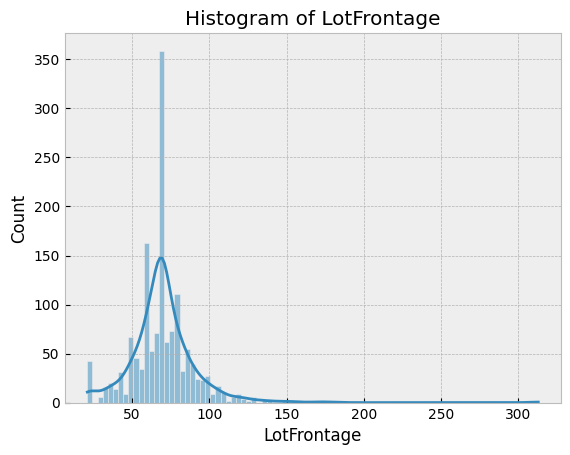

In [34]:
# plot histogram of the lot frontage
plt.style.use('bmh')
sns.histplot(x='LotFrontage', data=data3, kde=True)
plt.title('Histogram of LotFrontage');

- The histogram is positively skewed. It has a longer tail extending towards the right side, indicating a higher frequency of houses with lower prices.Fewer houses have high lot frontage above 150.

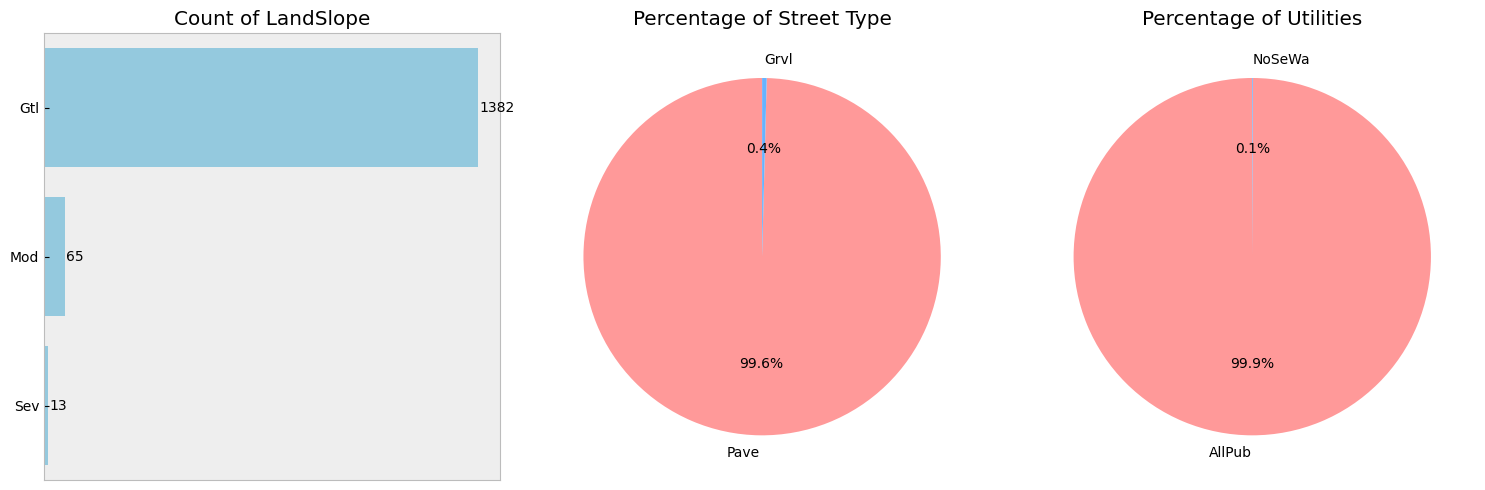

In [36]:
# Define colors for the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot count plot chart for LandSlope
ls = data3['LandSlope'].value_counts()
ax = sns.countplot(y='LandSlope', data=data3, order=ls.index, ax=axs[0], color='skyblue')
ax.set_title('Count of LandSlope')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])

# Add counts beside the bars
for i, v in enumerate(ls.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot pie chart for Street
count = Counter(data3['Street'])
axs[1].pie(count.values(), labels=count.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('Percentage of Street Type')

# Plot pie chart for Utilities
count = Counter(data3['Utilities'])
axs[2].pie(count.values(), labels=count.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
axs[2].set_title('Percentage of Utilities')

plt.tight_layout()
plt.show();

- Land slope: Most of the houses (1382) have gentle slopes
- Street Type: 99% of the houses have pavement type of street with just 1% having gravel type of street
- Utilities: - 99.9% of all houses have all public utilities installed in them.

C:\Users\hp\AppData\Local\Temp\ipykernel_22964\3918667565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='LandContour', data=data3, order=lc.index, ax=axs[0, 0], palette='husl')
C:\Users\hp\AppData\Local\Temp\ipykernel_22964\3918667565.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='LotShape', data=data3, order=sh.index, ax=axs[0, 1], palette='husl')
C:\Users\hp\AppData\Local\Temp\ipykernel_22964\3918667565.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='LotConfig', data=data3, order=co.index, ax=a

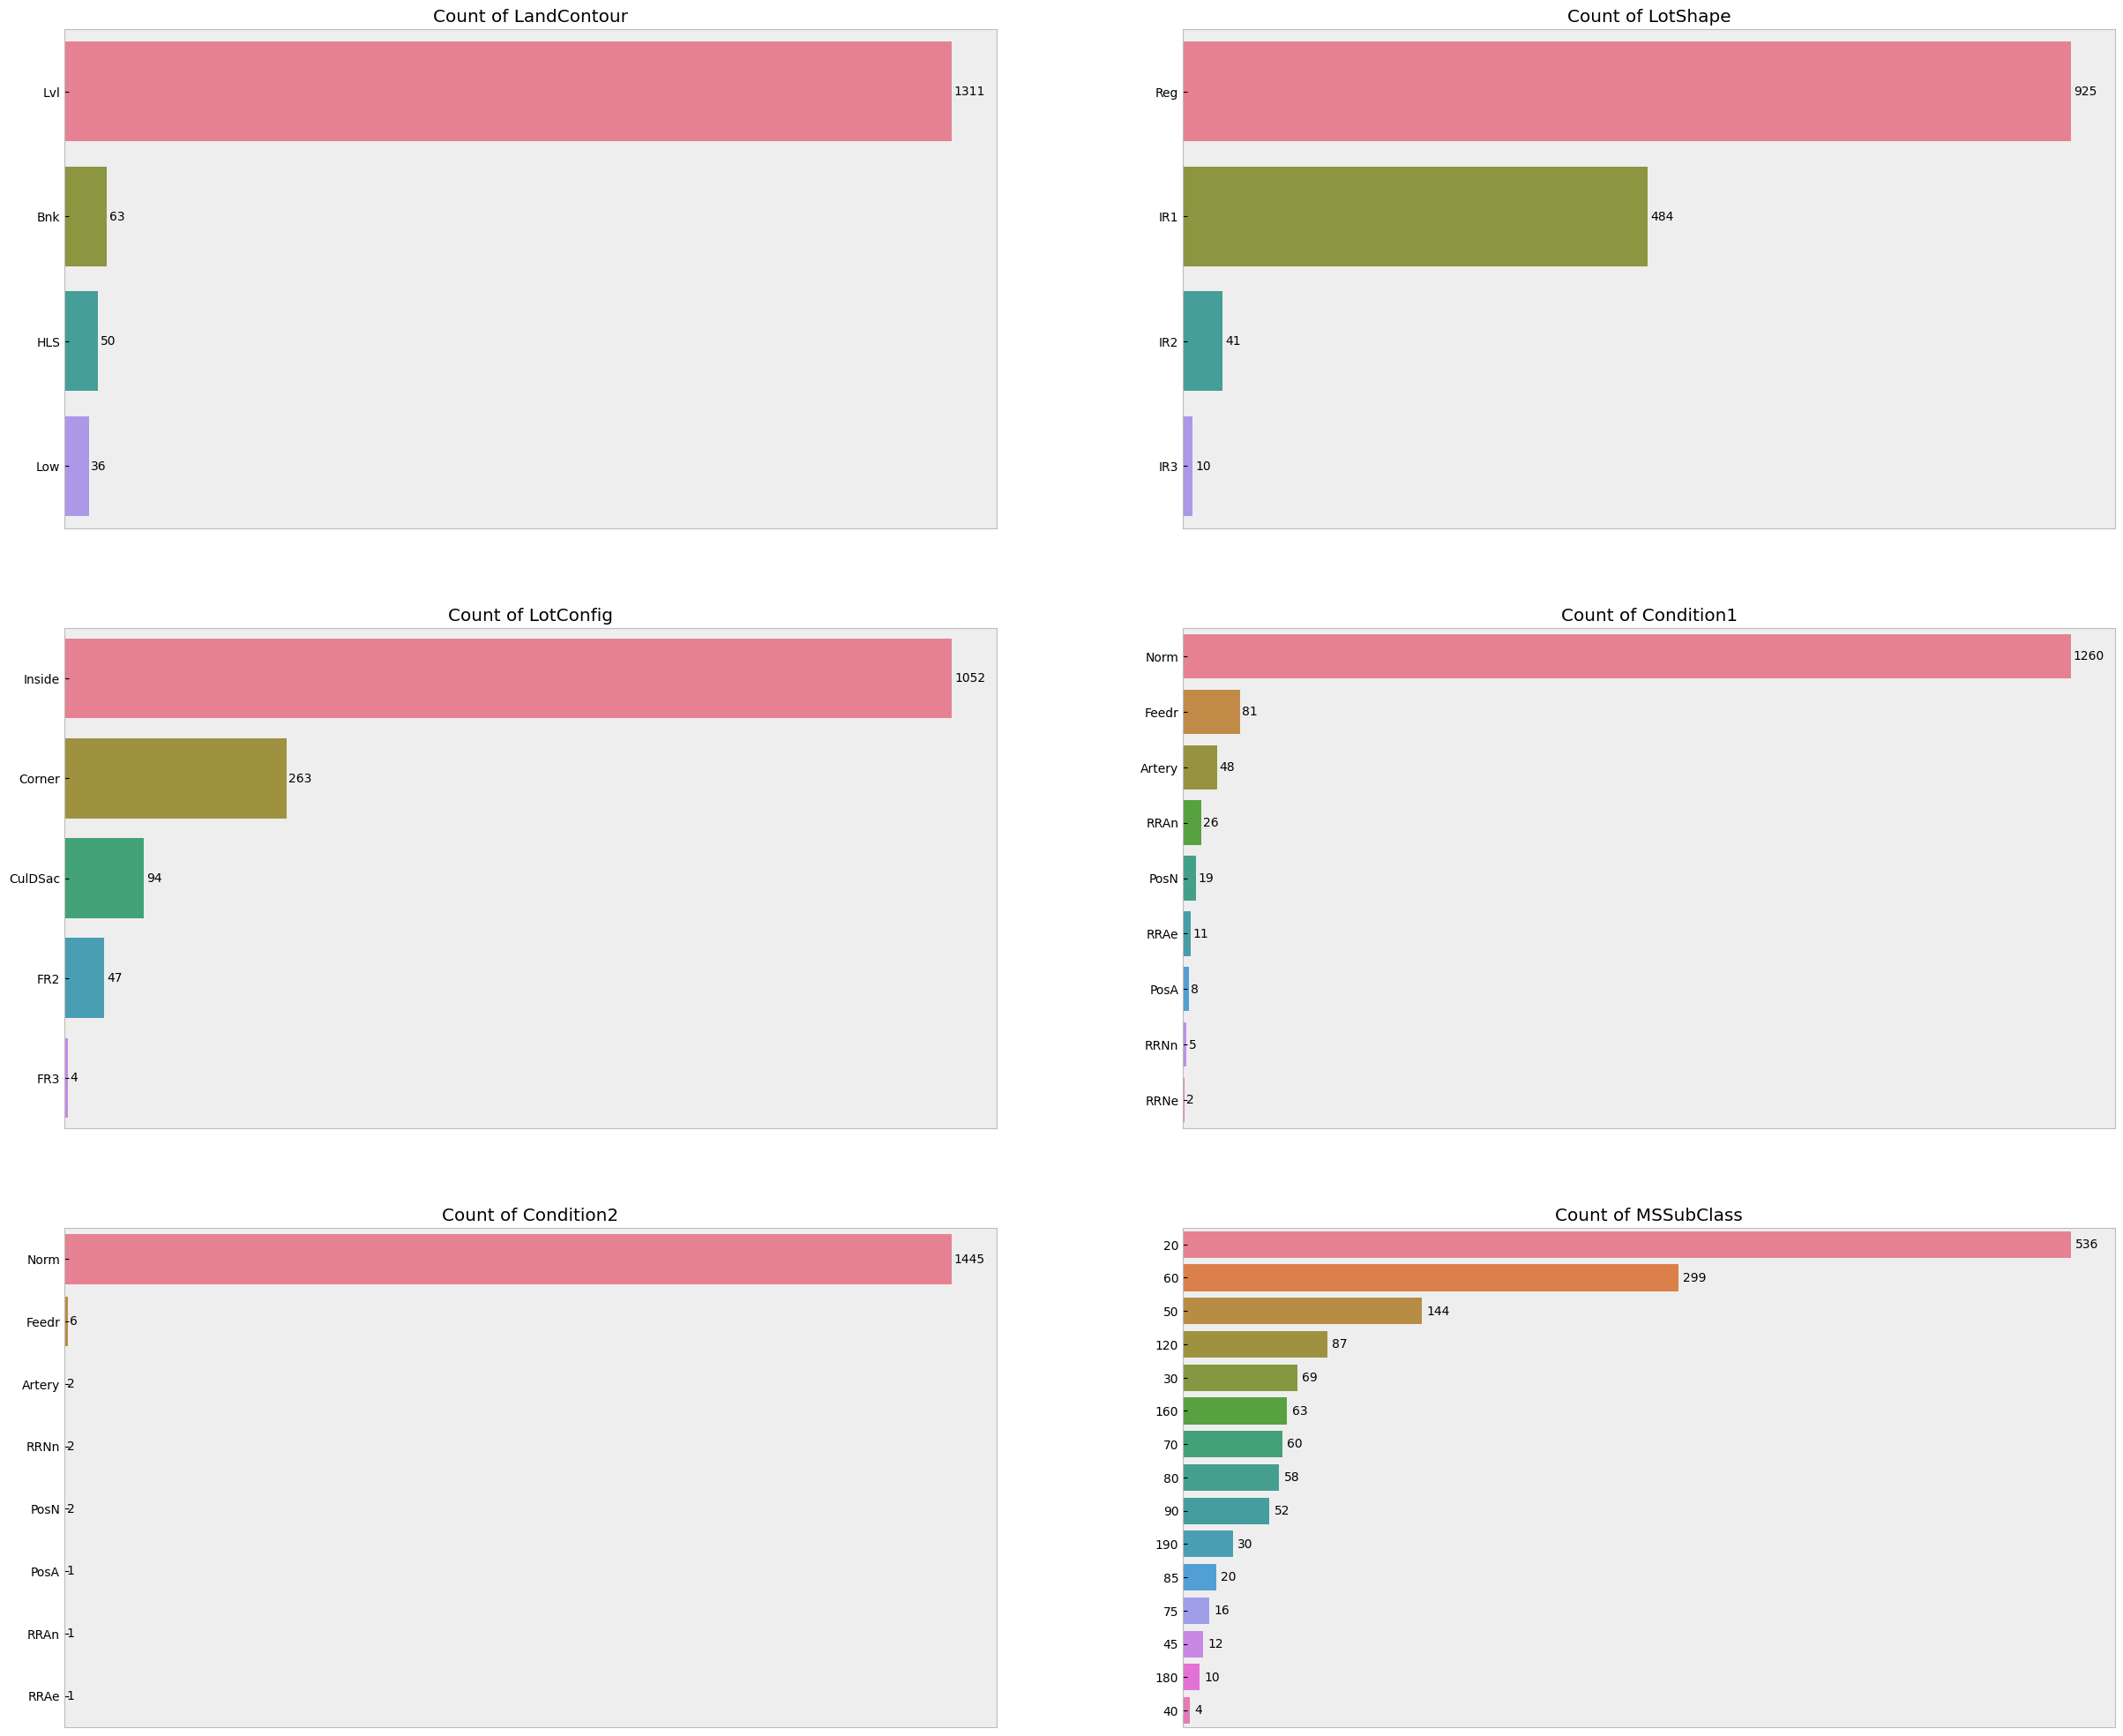

In [42]:
# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 25))

# Plot count plot chart for LandContour
lc = data3['LandContour'].value_counts()
ax = sns.countplot(y='LandContour', data=data3, order=lc.index, ax=axs[0, 0], palette='husl')
ax.set_title('Count of LandContour')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(lc.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot count plot chart for LotShape
sh = data3['LotShape'].value_counts()
ax = sns.countplot(y='LotShape', data=data3, order=sh.index, ax=axs[0, 1], palette='husl')
ax.set_title('Count of LotShape')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(sh.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot count plot chart for LotConfig
co = data3['LotConfig'].value_counts()
ax = sns.countplot(y='LotConfig', data=data3, order=co.index, ax=axs[1, 0], palette='husl')
ax.set_title('Count of LotConfig')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(co.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot count plot chart for Condition1
c1 = data3['Condition1'].value_counts()
ax = sns.countplot(y='Condition1', data=data3, order=c1.index, ax=axs[1, 1], palette='husl')
ax.set_title('Count of Condition1')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(c1.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot count plot chart for Condition2
c2 = data3['Condition2'].value_counts()
ax = sns.countplot(y='Condition2', data=data3, order=c2.index, ax=axs[2, 0], palette='husl')
ax.set_title('Count of Condition2')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(c2.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

# Plot count plot chart for MSSubClass
ms = data3['MSSubClass'].value_counts()
ax = sns.countplot(y='MSSubClass', data=data3, order=ms.index, ax=axs[2, 1], palette='husl')
ax.set_title('Count of MSSubClass')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
for i, v in enumerate(ms.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.show();

- LandContour: Most of the houses sold are near flat level properties
- Regular and slightly irregular shapes houses are the prevalent in the real estate market
- Inside (1052) and Corner (263) lot are the top 2 Lot configuration types of houses in the market.Only 4 of the houses have frontage on the 3 sides.
- The top and least conditions (1) are houses with normal proximity to various conditions(Norm - 1260) and houses (RRNe - 2) within 200' of East-West Railroad. The same is observed for condition2.
- The highest and lowest MSSubClass in the market are 20 (1-STORY 1946 & NEWER ALL STYLES) and 40 (1-STORY W/FINISHED ATTIC ALL AGES).

## Bivariate Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_22964\2026808649.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Condition1", y="SalePrice", data=data3, ci='sd', palette='Set2',  ax=axs[2,0])
C:\Users\hp\AppData\Local\Temp\ipykernel_22964\2026808649.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Condition1", y="SalePrice", data=data3, ci='sd', palette='Set2',  ax=axs[2,0])
C:\Users\hp\AppData\Local\Temp\ipykernel_22964\2026808649.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Condition2", y="SalePrice", data=data3, ci='sd', color='lightcoral',  ax=axs[2,1])


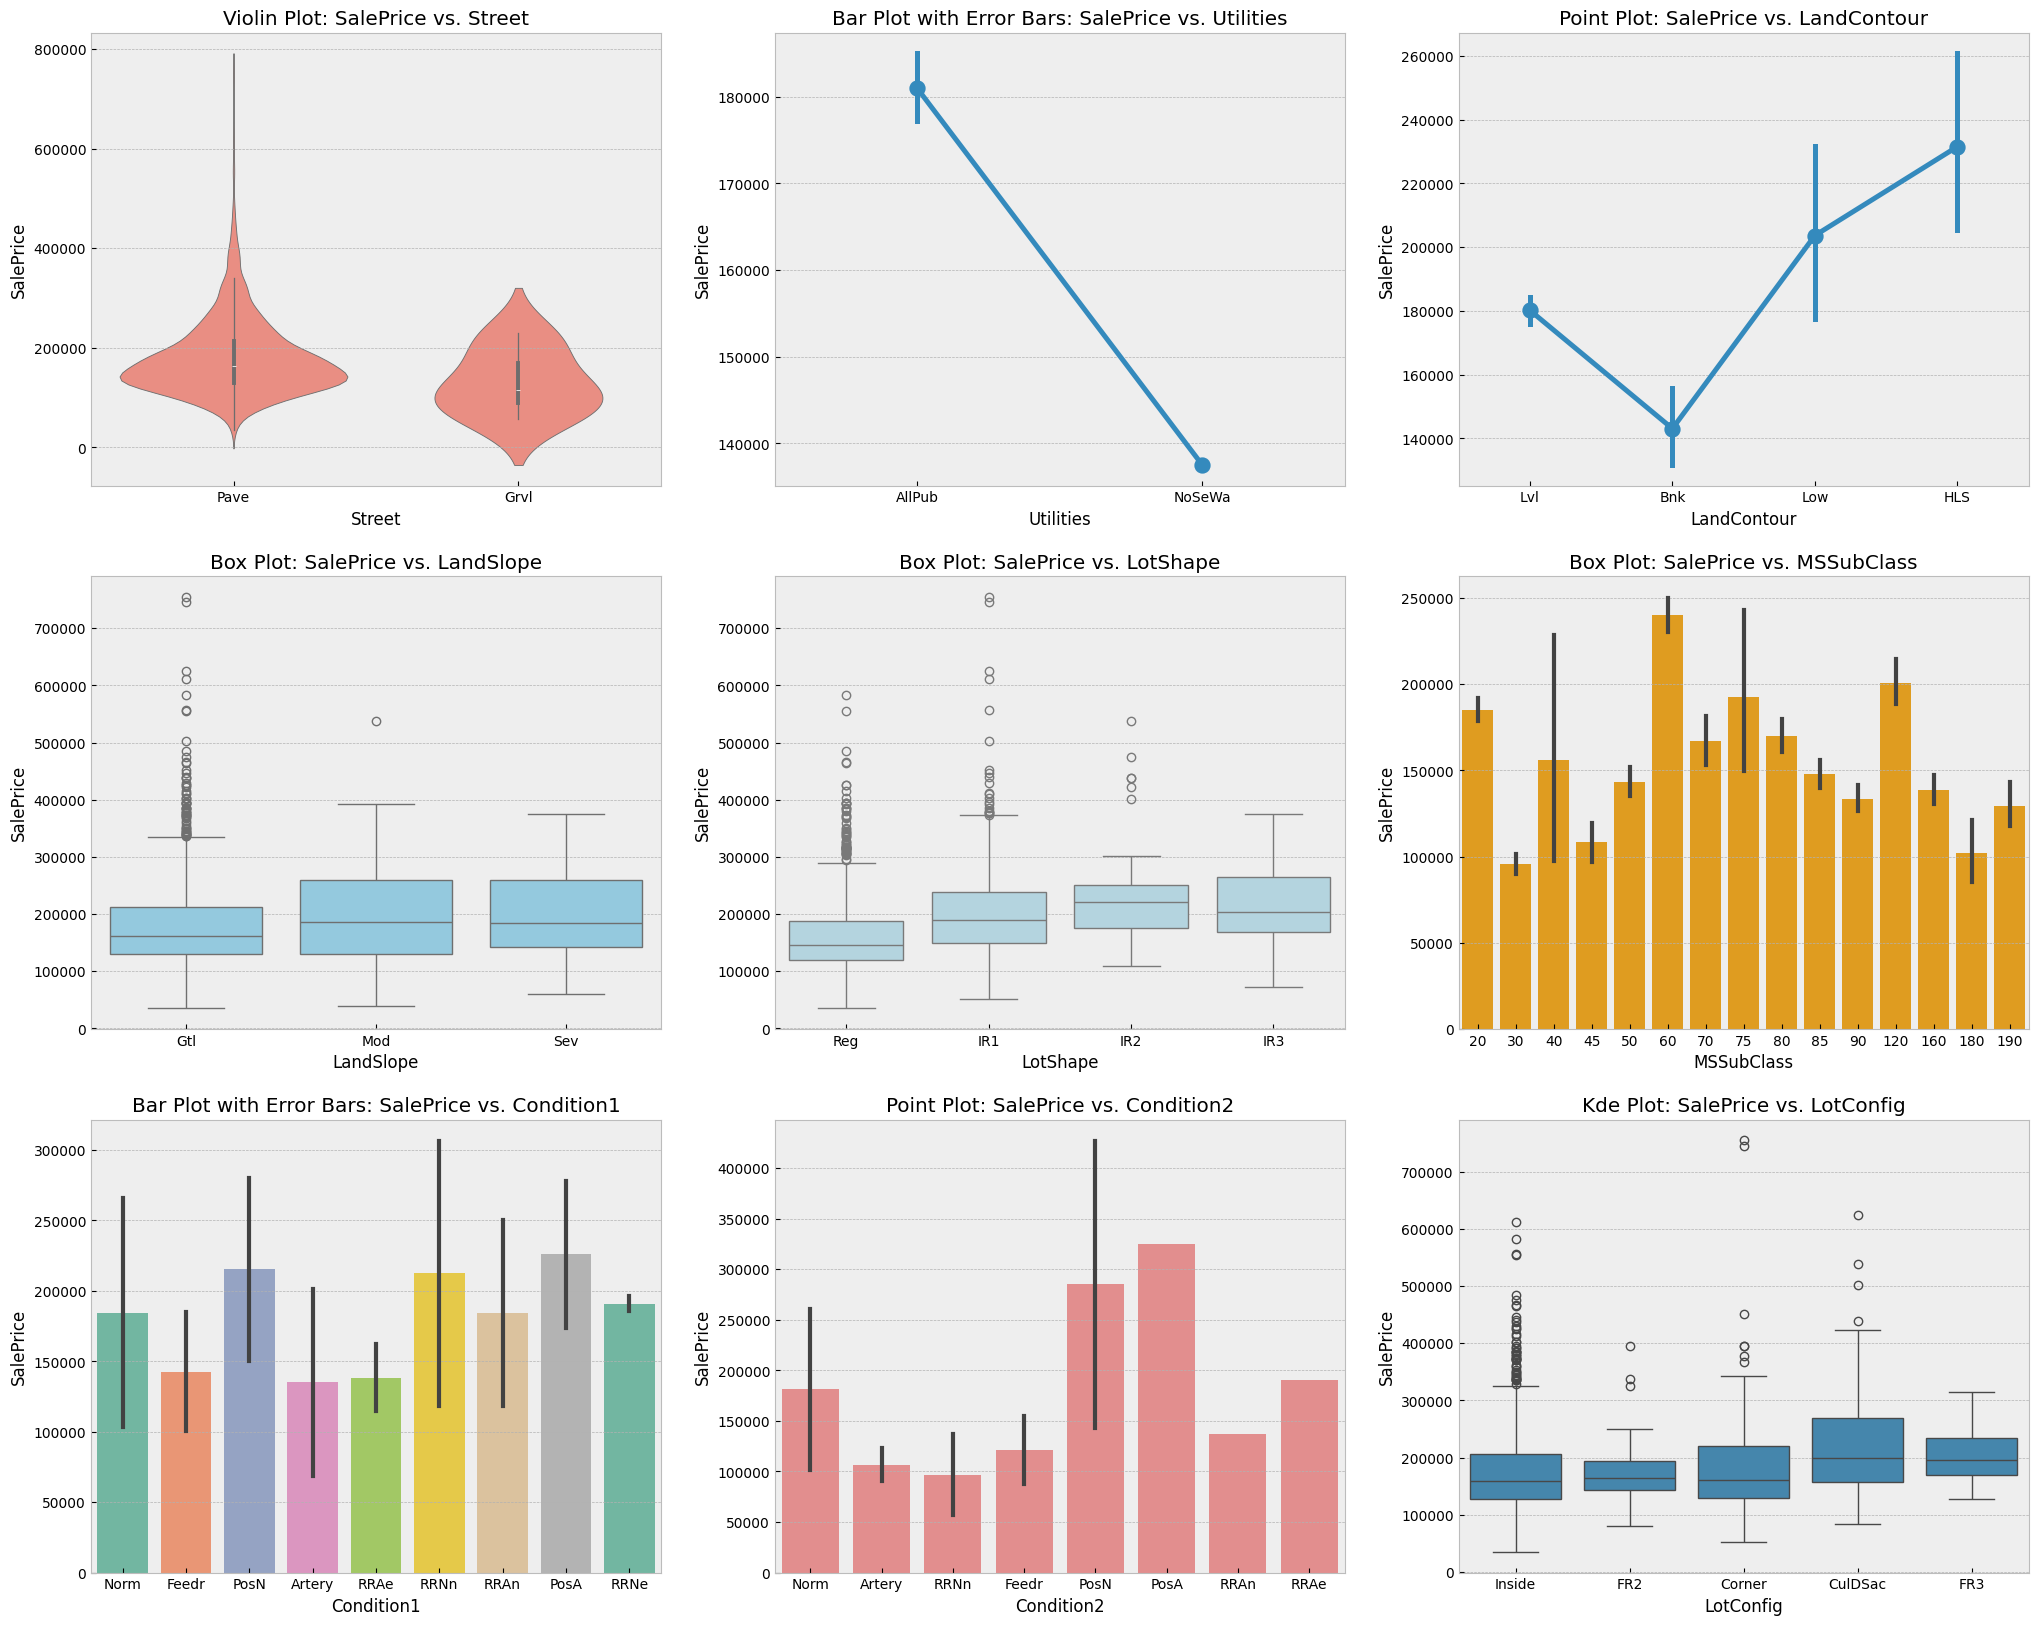

In [44]:
# create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

sns.violinplot(x="Street", y="SalePrice", data=data3, color='salmon', ax=axs[0,0])
axs[0,0].set_title('Violin Plot: SalePrice vs. Street')

sns.pointplot(x="Utilities", y="SalePrice", data=data3,  ax=axs[0,1])
axs[0,1].set_title('Bar Plot with Error Bars: SalePrice vs. Utilities')

sns.pointplot(x="LandContour", y="SalePrice", data=data3, ax=axs[0,2])
axs[0,2].set_title('Point Plot: SalePrice vs. LandContour')

sns.boxplot(x="LandSlope", y="SalePrice", data=data3, color='skyblue',  ax=axs[1,0])
axs[1,0].set_title('Box Plot: SalePrice vs. LandSlope')

sns.boxplot(x="LotShape", y="SalePrice", data=data3, color='lightblue',  ax=axs[1,1])
axs[1,1].set_title('Box Plot: SalePrice vs. LotShape')

sns.barplot(x="MSSubClass", y="SalePrice", data=data3, color='orange',  ax=axs[1,2])
axs[1,2].set_title('Box Plot: SalePrice vs. MSSubClass')

sns.barplot(x="Condition1", y="SalePrice", data=data3, ci='sd', palette='Set2',  ax=axs[2,0])
axs[2,0].set_title('Bar Plot with Error Bars: SalePrice vs. Condition1')

sns.barplot(x="Condition2", y="SalePrice", data=data3, ci='sd', color='lightcoral',  ax=axs[2,1])
axs[2,1].set_title('Point Plot: SalePrice vs. Condition2')

sns.boxplot(x="LotConfig", y="SalePrice", data=data3, ax=axs[2,2])
axs[2,2].set_title('Kde Plot: SalePrice vs. LotConfig');

- LotConfig: CulDSac house typeb have the highest sales price while inside house types have the lowest sales price. Although inside house type lotConfig have high number of outliers with prices as high as 600000 while corner house type config have few outliers with prices above 700000.
- Condition1:PoSA, PosN and PRae have the highest sales price while the lowest is Artery.
- Condition2: RRNn have the lowest sales price while PosA have the highest sales price.
- Lotshape: IR2 have the highest median value followed by IR3 but IR3 have lager variability in salesprice. Reg lot shape houses have the lowest sales price. Although, Reg and IR1 house types have a lot of outliers with extreme sales price.
- MSSubClass: 2 storey buildings 1446 & newer (60) have the higehst sales price while 1 storey 1945 and older have the lowest sales price.
- Street: The distribution of sales prices for properties with pavement access is much wider than the distribution for properties with gravel access. This suggests that there is a greater range of prices for properties with pavement access.The median sales price for properties with pavement access is higher than the median sales price for properties with gravel access. This suggests that, on average, properties with pavement access sell for more than properties with gravel access.There is some overlap between the two distributions. This means that there are some properties with gravel access that sold for more than some properties with pavement access.
- Utilities: Two major type stands out. Normal and NoSeWa. Overall, houses with normal public utilities have a higher sales price.
- LandContour: Houses with HLS land contour have the highest sales price while Bnk have the lowest prices. Although there are some outliers.
- Landslope: Sev and Mod type of houses have the highest sales price. Gtl type of houses have the lowest salesprice. Although Gt1 have a lot of extreme outliers with some outliers having salesprice higher than 700000.

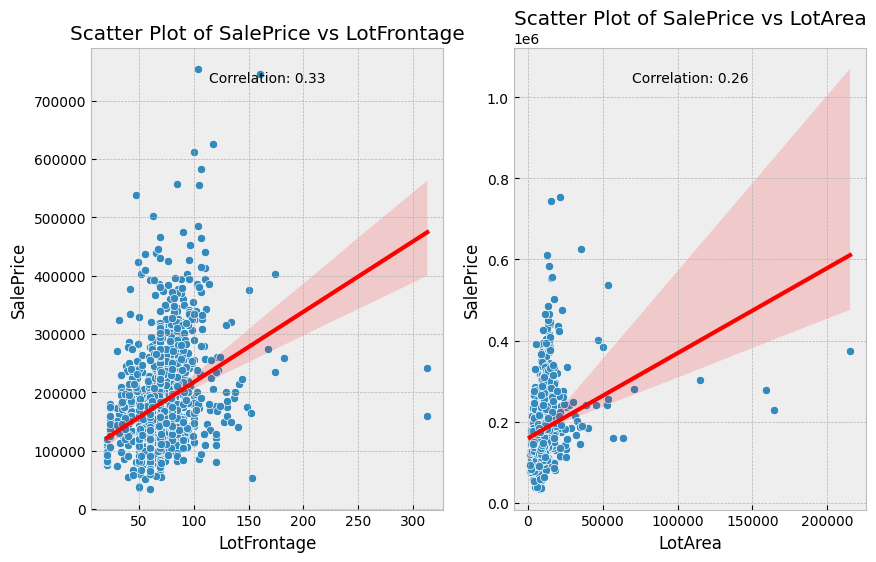

In [47]:
# Create scatter plot with regression line
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.scatterplot(x='LotFrontage', y='SalePrice', data=data3, ax=axs[0])
sns.regplot(x='LotFrontage', y='SalePrice', data=data3, scatter=False, color='red', ax=axs[0])
axs[0].set_xlabel('LotFrontage')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Scatter Plot of SalePrice vs LotFrontage')

sns.scatterplot(x='LotArea', y='SalePrice', data=data3, ax=axs[1])
sns.regplot(x='LotArea', y='SalePrice', data=data3, scatter=False, color='red', ax=axs[1])
axs[1].set_xlabel('LotArea')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('Scatter Plot of SalePrice vs LotArea')

correlation_lot_frontage = data3['LotFrontage'].corr(data3['SalePrice'])
correlation_lot_area = data3['LotArea'].corr(data3['SalePrice'])
axs[0].text(0.5, 0.95, f'Correlation: {correlation_lot_frontage:.2f}', horizontalalignment='center', verticalalignment='top', transform=axs[0].transAxes)
axs[1].text(0.5, 0.95, f'Correlation: {correlation_lot_area:.2f}', horizontalalignment='center', verticalalignment='top', transform=axs[1].transAxes)
                   
plt.show();

- There is a weak positive correlation between sales price, lot area and lot frontage